# Getting the Data Ready
This notebook is for cleaning up data, generate more columns, change data type, etc.


In [12]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [13]:
#read data, specify index so it's easier to join and search using loc
path = '../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'selected_columns_listings.csv')
listings = pd.read_csv(listings_csv)

In [14]:
#to get all columns, set option
pd.set_option('display.max_columns', 107)
#to get text with no truncation
pd.set_option('display.max_colwidth', -1)

In [15]:
#shape
listings.shape

(50796, 73)

In [16]:
listings.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'avai

In [17]:
#head
listings.head(1)

,id,listing_url,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,Modern NYC,2259,https://www.airbnb.com/users/show/2259,Jenny,2008-08-18,US,a few days or more,22%,50%,f,Washington Heights,0.0,0.0,['reviews'],f,"New York, NY, United States",Manhattan,Washington Heights,Manhattan,New York,NY,10040,New York,"New York, NY",40.85722,-73.9379,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",$100.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,4 weeks ago,30,60,90,365,1,0,2008-09-22,2008-09-22,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,0,1,0,0.01


In [21]:
#count how many records got reviews last 1 year
scraped_date = datetime.strptime('2020-03-14',"%Y-%m-%d")
listings['last_review_days_ago'] = (scraped_date - pd.to_datetime(listings['last_review'])).dt.days
filt = listings['last_review_days_ago'] <= 365
listings['property_type'][filt].count()


26068

In [22]:
#create new df for only records that have reviews in last 200 days
listings = listings[filt]

In [23]:
listings['last_review_days_ago'].head()

1    131
2    20 
3    153
5    103
6    15 
Name: last_review_days_ago, dtype: int64

# Drop unused columns
May use it later but remove for now

In [24]:
Unused_columns = ['listing_url', 'host_location', 'name', 'host_id', 'host_url', 'host_name', 'host_total_listings_count', 'city', 'street', 'state', 'zipcode', 'neighbourhood', 'host_neighbourhood', 'neighbourhood_cleansed', 'market', 'smart_location', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
'availability_60', 'availability_90', 'availability_365']

listings.drop(columns=Unused_columns, inplace = True)

# Dealing with null values
Fill with 0, dropping null, fill with avg

## Analysis
group by, count null, etc


In [25]:
colname = 'host_since'
listings[colname].isna().sum()

##run this to find out how many nulls on all columns
# listings.isna().sum()

0

In [26]:
#run this to get group by
listings.groupby(colname)[colname].count().head(5)

host_since
2008-08-27    1
2008-09-07    8
2008-09-09    1
2008-09-10    2
2008-09-25    1
Name: host_since, dtype: int64

In [27]:
#get sample records of null to see if we can use other columns to fill
filt = listings[colname] == '2.5'
listings[filt]['host_since'].head(1)

Series([], Name: host_since, dtype: object)

## Dropping null rows
Dropping na when rec counts as  there are not too many


In [28]:
Drop_na = ['host_since', 'host_listings_count', 'host_identity_verified', 'host_is_superhost']
listings = listings.dropna(subset=Drop_na)


## Fill with 0 or 0 variance

In [29]:
#fill with 0
Fill_with_zero = ['bathrooms', 'bedrooms', 'host_is_superhost', 'beds', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for column in Fill_with_zero:
    listings[column] = listings[column].replace(np.nan, '0')




In [30]:
#fill with $0.00
Fill_with_zero = ['security_deposit', 'cleaning_fee']

for column in Fill_with_zero:
    listings[column] = listings[column].replace(np.nan, '$0.00')

## Fill with average

In [31]:
#host_response_time will be converted to 1,2,3,4. So 2.5 is the middle value
listings['host_response_time'] = listings['host_response_time'].replace(np.nan, '2.5')
#host_acceptance_rate avg 50%
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace(np.nan, '50%')


# Put aside features
Need to deal with this later: 'first_review', 'last_review', 'host_response_rate', 'host_acceptance_rate'
 

# Array data type - exploration
First part is querying the two columns which as array: host_verifications and amenities

In [32]:
#convert values of host_verifications to list
host_verifications = listings['host_verifications'].values.tolist()

#host verivication split and add to list
host_verification_all = []

for row in host_verifications:
    row_clean = row.replace('[','').replace(']','')
    methods = row_clean.split(',')
    for method in methods:
        method_clean = method.replace("'","").strip()
        host_verification_all.append(method_clean)

Counter(host_verification_all).most_common(5)

[('phone', 26027),
 ('email', 24203),
 ('government_id', 17423),
 ('reviews', 16452),
 ('offline_government_id', 13075)]

In [33]:
#convert values of amenities to list
amenities = listings['amenities'].values.tolist()

#amenities split and add to list
amenities_all = []

for row in amenities:
    row_string = str(row)
    row_string_clean = row_string.replace('{','').replace('}','')
    amenities_rows = row_string_clean.split(',')
    for row in amenities_rows:
        row_clean = row.replace('"','')
        amenities_all.append(row_clean)

Counter(amenities_all).most_common()

[('Wifi', 25704),
 ('Heating', 25349),
 ('Essentials', 25233),
 ('Smoke detector', 23933),
 ('Kitchen', 23342),
 ('Air conditioning', 23167),
 ('Hangers', 22354),
 ('Carbon monoxide detector', 20704),
 ('Hair dryer', 20622),
 ('Hot water', 20417),
 ('Shampoo', 19886),
 ('Iron', 19627),
 ('TV', 18478),
 ('Laptop friendly workspace', 18465),
 ('Refrigerator', 17763),
 ('Dishes and silverware', 17697),
 ('Cooking basics', 15074),
 ('Microwave', 15051),
 ('Stove', 14782),
 ('Free street parking', 14595),
 ('Oven', 14210),
 ('Coffee maker', 14149),
 ('Bed linens', 12345),
 ('Fire extinguisher', 12262),
 ('Lock on bedroom door', 11478),
 ('First aid kit', 10892),
 ('Washer', 9599),
 ('Dryer', 9454),
 ('Extra pillows and blankets', 8945),
 ('Self check-in', 7982),
 ('Long term stays allowed', 7422),
 ('Private entrance', 7355),
 ('Luggage dropoff allowed', 6448),
 ('Cable TV', 6299),
 ('Dishwasher', 5929),
 ('Family/kid friendly', 5743),
 ('Elevator', 5484),
 ('Internet', 5456),
 ('Host greet

# Array data type - reformatting
This step is creating multiple boolean columns to be used in the model

In [34]:
#function to remove some characters, clean up value
def clean_array(row):
    row = row.str.replace('[', '')
    row = row.str.replace(']', '')
    row = row.str.replace('{', '')
    row = row.str.replace('}', '')
    row = row.str.replace("'", '')
    row = row.str.replace('"', '')
    return row

In [35]:
#array_columns = ['host_verifications', 'amenities']
array_columns = ['host_verifications']
#apply get
array_columns_clean = listings[array_columns].apply(lambda col: clean_array(col))

# Create new columns based on unique value in the array
array_bool_columns = []

for col in listings[array_columns].columns:
    colname = array_columns_clean[col].str.get_dummies(sep=',');
    colname = colname.add_prefix(col + '_');
    array_bool_columns.append(colname);

#add to the listing
listings = listings.join(array_bool_columns)

#drop original columns
listings = listings.drop(array_columns,axis = 1)

#print all addtional columns
#array_bool_columns

In [36]:
#array_columns = ['host_verifications', 'amenities']
array_columns = ['amenities']
#apply get
array_columns_clean = listings[array_columns].apply(lambda col: clean_array(col))

# Create new columns based on unique value in the array
array_bool_columns = []

for col in listings[array_columns].columns:
    colname = array_columns_clean[col].str.get_dummies(sep=',');
    colname = colname.add_prefix(col + '_');
    array_bool_columns.append(colname);

#add to the listing
listings = listings.join(array_bool_columns)

#drop original columns
listings = listings.drop(array_columns,axis = 1)

#print all addtional columns
#array_bool_columns

# Currency conversion
This will remove dollars sign, comma and then convert to float

In [37]:
#function
def fix_currency(row):
    row = row.replace(',', '')
    row = row.replace('$', '')
    return row

In [38]:
#Currency = ['extra_people', 'price', 'cleaning_fee' ]
#also convert to float

colname = 'extra_people'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'price'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'cleaning_fee'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'security_deposit'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

In [39]:
listings['cleaning_fee'].head(10)


1     95.0 
2     0.0  
3     125.0
5     0.0  
6     15.0 
9     0.0  
11    67.0 
12    80.0 
14    90.0 
15    0.0  
Name: cleaning_fee, dtype: float64

# Looking at price relationship with property types

In [40]:
#filt = listings['property_type'] == 'Hotel'
filt = listings['price'] > 2000
temp = listings[filt]
temp.groupby('property_type')['property_type'].count()
#temp['price'].max()

property_type
Apartment         8 
Boutique hotel    33
Hotel             2 
House             2 
Loft              2 
Townhouse         7 
Name: property_type, dtype: int64

In [46]:
#filt = listings['price'] <2000
filt = listings['room_type'] == 'Hotel room'
temp = listings[filt]
temp.groupby(['property_type', 'room_type'])[['property_type', 'room_type']].count()


,,property_type,room_type
property_type,room_type,,
Aparthotel,Hotel room,1,1
Bed and breakfast,Hotel room,3,3
Boutique hotel,Hotel room,86,86
Hostel,Hotel room,6,6
Hotel,Hotel room,122,122
Resort,Hotel room,1,1
Serviced apartment,Hotel room,25,25


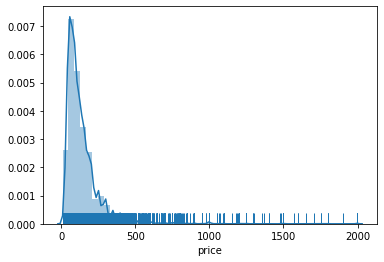

In [54]:
#see in the graph
filt = (listings['price'] < 2000) & (listings['price'] > 0)
sns.distplot(listings['price'][filt], rug=True)

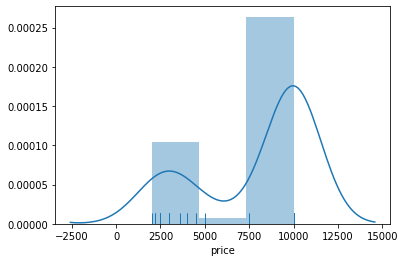

In [130]:
#see in the graph for all price more than 2000
filt = (listings['price'] > 2000) 
sns.distplot(listings['price'][filt], rug=True)

In [58]:
#dropping records with certain property type, mostly hotels and records with bad price (0 or more than 2000)
filt = (~listings['property_type'].isin (['Aparthotel','Bed and breakfast','Boutique hotel',' Hostel', 'Hotel', 'Resort'])) & (listings['price'] > 0) & (listings['price'] < 2000)

#filt = (listings['price'] < 1000) & (listings['price'] > 20)
listings['property_type'][filt].count()

25604

In [59]:
#new df with 
listings = listings[filt]

# Category conversion
Use one hot encoding

In [60]:
# Get one hot encoding of column neighbourhood_group_cleansed
one_hot_encoding_columns = ['neighbourhood_group_cleansed', 'property_type', 'room_type', 'cancellation_policy', 'bed_type']
listings = pd.get_dummies(data=listings, columns=one_hot_encoding_columns)

# Boolean conversion
Converting the value to 1 and 0 from 't' and 'f'.

In [61]:
#function to replace
def convert_bool(row):
    row = row.replace('f', '0')
    row = row.replace('t', '1')
    return row

In [62]:
# #update rows and convert to boo
Boolean_columns = ['host_is_superhost', 'is_location_exact', 'instant_bookable', 'host_identity_verified']

for column in Boolean_columns:
    listings[column] = listings[column].apply(lambda col: convert_bool(col)).astype(int)


# String conversion
Needs to convert to numbers/float

In [63]:
#function to replace
def convert_string_to_int(row):
    row = row.replace('within an hour', '1')
    row = row.replace('within a few hours', '2')
    row = row.replace('within a day', '3')
    row = row.replace('a few days or more', '4')
    return row

In [64]:
colname = ['host_response_time']

listings[colname] = listings[colname].apply(lambda col: convert_string_to_int(col)).astype(float)

In [65]:
listings.groupby('host_response_time')['host_response_time'].count()

host_response_time
1.0    15748
2.0    4241 
2.5    2520 
3.0    2618 
4.0    477  
Name: host_response_time, dtype: int64

# Date conversion
Convert to date then to ordinal

In [66]:
#conver to date first
listings['host_since'] = pd.to_datetime(listings['host_since'])

listings['host_since'] = listings['host_since'].apply(lambda x: x.toordinal())



In [67]:
listings['host_since'].head()

1    733294
2    733383
3    733440
5    733441
6    733469
Name: host_since, dtype: int64

In [68]:
listings.head(1)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,last_review_days_ago,host_verifications_ facebook,host_verifications_ google,host_verifications_ government_id,host_verifications_ identity_manual,host_verifications_ jumio,host_verifications_ kba,host_verifications_ manual_offline,host_verifications_ manual_online,host_verifications_ offline_government_id,host_verifications_ phone,host_verifications_ reviews,host_verifications_ selfie,host_verifications_ sent_id,host_verifications_ sesame,host_verifications_ sesame_offline,host_verifications_ weibo,host_verifications_ work_email,host_verifications_ zhima_selfie,host_verifications_email,...,amenities_Wide entrance for guests,amenities_Wide entryway,amenities_Wide hallways,amenities_Wifi,amenities_Window guards,amenities_translation missing: en.hosting_amenity_49,amenities_translation missing: en.hosting_amenity_50,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Apartment,property_type_Barn,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1,2595,733294,3.0,87%,38%,0,6.0,1,40.75362,-73.98377,0,2,1,0,1,225.0,350.0,95.0,1,0.0,48,5,2009-11-21,2019-11-04,94,9,9,10,10,10,9,0,0.38,131,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [69]:
listings.columns.values

array(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude',
       'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'last_review_days_ago', 'host_verifications_ facebook',
       'host_verifications_ google', 'host_verifications_ government_id',
       'host_verifications_ identity_manual', 'host_verifications_ jumio',
       'host_verifications_ kba', 'host_verifications_ manual_offline',
    

# Export to CSV
Clean data for model to use

In [40]:
#export columns left to csv to be used with second notebook
path = '../../data/new-york-city-airbnb-open-data/'

listings_csv = os.path.join(path,'model_columns_listings.csv')
listings.to_csv(listings_csv)